<a href="https://colab.research.google.com/github/davidhe2013/ai-science-training-series/blob/main/2022_10_6_David%20He_Session%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is my homework

(400, 2) (400,) (4, 2)


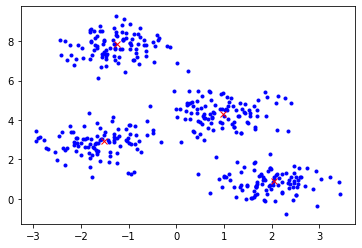

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as ipydis
npoints = 400
N = 4
x, cluster_labels, cluster_centers = make_blobs(n_samples=npoints, centers=N,
                       cluster_std=0.60, random_state=0,
                       return_centers=True)
print(x.shape,cluster_labels.shape,cluster_centers.shape)
plt.plot(x[:, 0], x[:, 1],'b.')
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'rx')

In [ ]:
def initialize_centroids(x,N):
   x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
   centroids = x[x_indices]
   return centroids

def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])

In [ ]:
# distance is sqrt( (x - x')**2 + (y - y')**2 )
def assign_labels(x,c):
   # centroids are shape [N,2]
   # x are shape [npoints,2]
   # add middle index to centroids to properly broadcast in math operations
   c = c[:,np.newaxis,:] # [N,1,2]
   
   # calculate (x - x')**2 and (y - y')**2
   # x is shape [npoints,2], c is [N,1,2] results in an array of shape: [N,npoints,2]
   dist2 = (x - c)**2
   
   # calculate (x - x')**2 + (y - y')**2
   dist2 = dist2.sum(axis=2) # [N,npoints]
   
   # out of the N distances, return the index (0-(N-1)) of the one that is the minimum.
   label = np.argmin(dist2,axis=0) # [npoints]

   return label

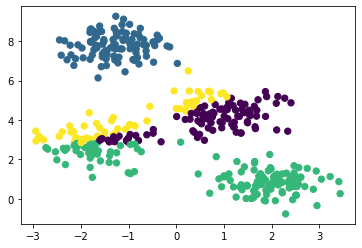

In [ ]:
c = initialize_centroids(x,N)
l = assign_labels(x,c)
plt.scatter(x[:, 0], x[:, 1], c=l, s=40, cmap='viridis')

accuracy:  0.28


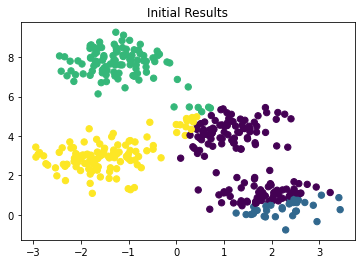

accuracy:  0.5


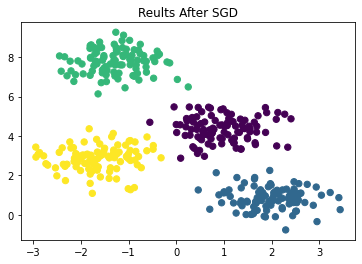

In [18]:
centroids = initialize_centroids(x,N)
labels = assign_labels(x,centroids)
centroids = get_new_centroids(x, labels, N)

# we can use the "truth" labels, cluster_labels to see how well we are doing
# accuracy: # of points correctly labeled / total number of points
accuracy = np.sum((cluster_labels == labels).astype(int)) / cluster_labels.shape[0]
print('accuracy: ',accuracy)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis')
plt.title('Initial Results')
plt.show()




def updated_centriods(x,c,learning_rate):
   c = c[:,np.newaxis,:] # [N,1,2]
   dL_dc = - 2 * (x-c)
   dL_dc = np.mean(dL_dc, axis=1)
   c=c.reshape(N,2)
   return c - learning_rate * dL_dc

learning_rate = 1e-7

# we run our loop N times
loop_N = 300
for i in range(loop_N):
   # update centroids
   updated_c=updated_centriods(x,centroids,learning_rate)
   labels = assign_labels(x,updated_c)
   centroids = get_new_centroids(x,labels,N)
   
# we can use the "truth" labels, cluster_labels to see how well we are doing
# accuracy: # of points correctly labeled / total number of points
accuracy = np.sum((cluster_labels == labels).astype(int)) / cluster_labels.shape[0]
print('accuracy: ',accuracy)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis')
plt.title('Reults After SGD')
plt.show()



# Homework
Follow the example from the previous notebook [Linear Regression using SGD](./01_linear_regression_sgd.ipynb) and build a loop that properly finds the centers of these 4 clusters using k-means.